In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing and checking data

In [2]:
data = pd.read_csv("data/winequality-red.csv")

Looks like we have 10 features and they need to be normalized if we do any machine or deep learning. 

In [3]:
data.head()
# What are the units on these???

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

The data set is fairly small though, with only 1599 entries. Maybe we can try augmenting it later?

In [7]:
size = len(data)
data.describe().round(2)

fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   
min         0.01                 1.00                  6.00     0.99     2.74   
25%         0.07                 7.00                 22.00     1.00     3.21   
50%         0.08                14.00                 38.00     1.00     3.31   
75%         0.09                21.00                 62.00     1.00     3.40   
max         0.61                72.00                289.00     1.00     4.01   

       sulphates  alcohol  quality  
count    1599.00  1599.00  1599.00  
mean        0.66    10.42     5.64  
std         0.17     1.07     0.81  
min         0.33     8.40     3.00  
25%         0.55     9.50     5.00  
50%         0.62    10.20     6.00  
75%         0.73    11.10     6.00  
max         2.00    14.90     8.00

In [8]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

it looks like quality is the label with classes 3, 4, 5, 6, 7, 8

### Viewing Data

First, let's check if there is an even distribution of class labels. 

<Axes: xlabel='quality', ylabel='Count'>

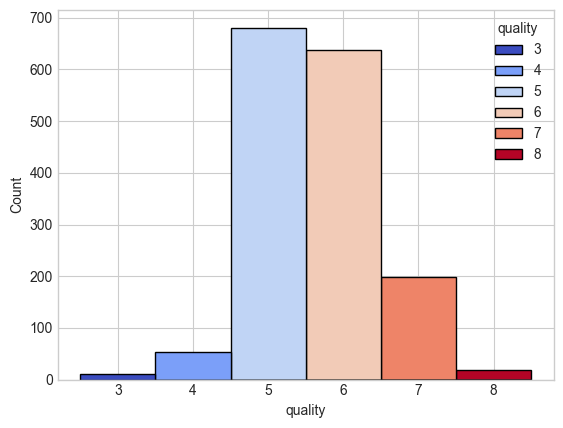

In [130]:
sns.histplot(data = data, x = data['quality'], hue = data['quality'],
             palette='coolwarm', alpha = 1, discrete = True)

Nope. The vast majority of the sampled with has a quality of 5 or 6.

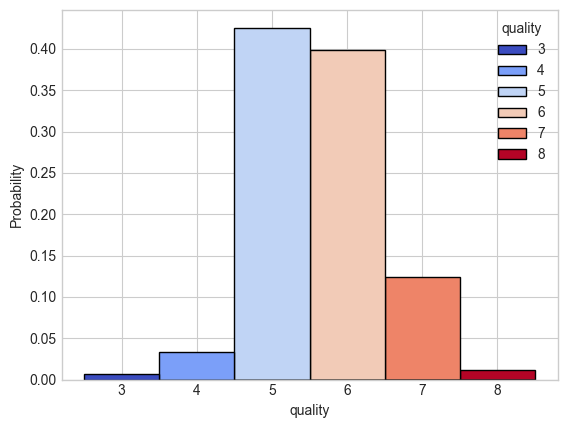

82.49% of the wines are rated as a 5 or 6 quality


In [141]:
sns.histplot(data = data, x = data['quality'], hue = data['quality'],
             palette='coolwarm', alpha = 1, stat = 'probability', discrete = True)
plt.show()

proportion = ((len(data[data['quality']== 5]) + len(data[data['quality']== 6])) / len(data))*100

print(f'{proportion:.2f}% of the wines are rated as a 5 or 6 quality')

In [125]:
len(data[data["quality"]==5])

681

In [ ]:
The data set is very unbalanced. 

With these plots, I was attempting to determine whether or not there is a correlation between the feature of the wine and the quality. I don't think there is because this is the real world, but figured I'd check for fun. Unfortunately, quality is discrete data. Unless there are extremes

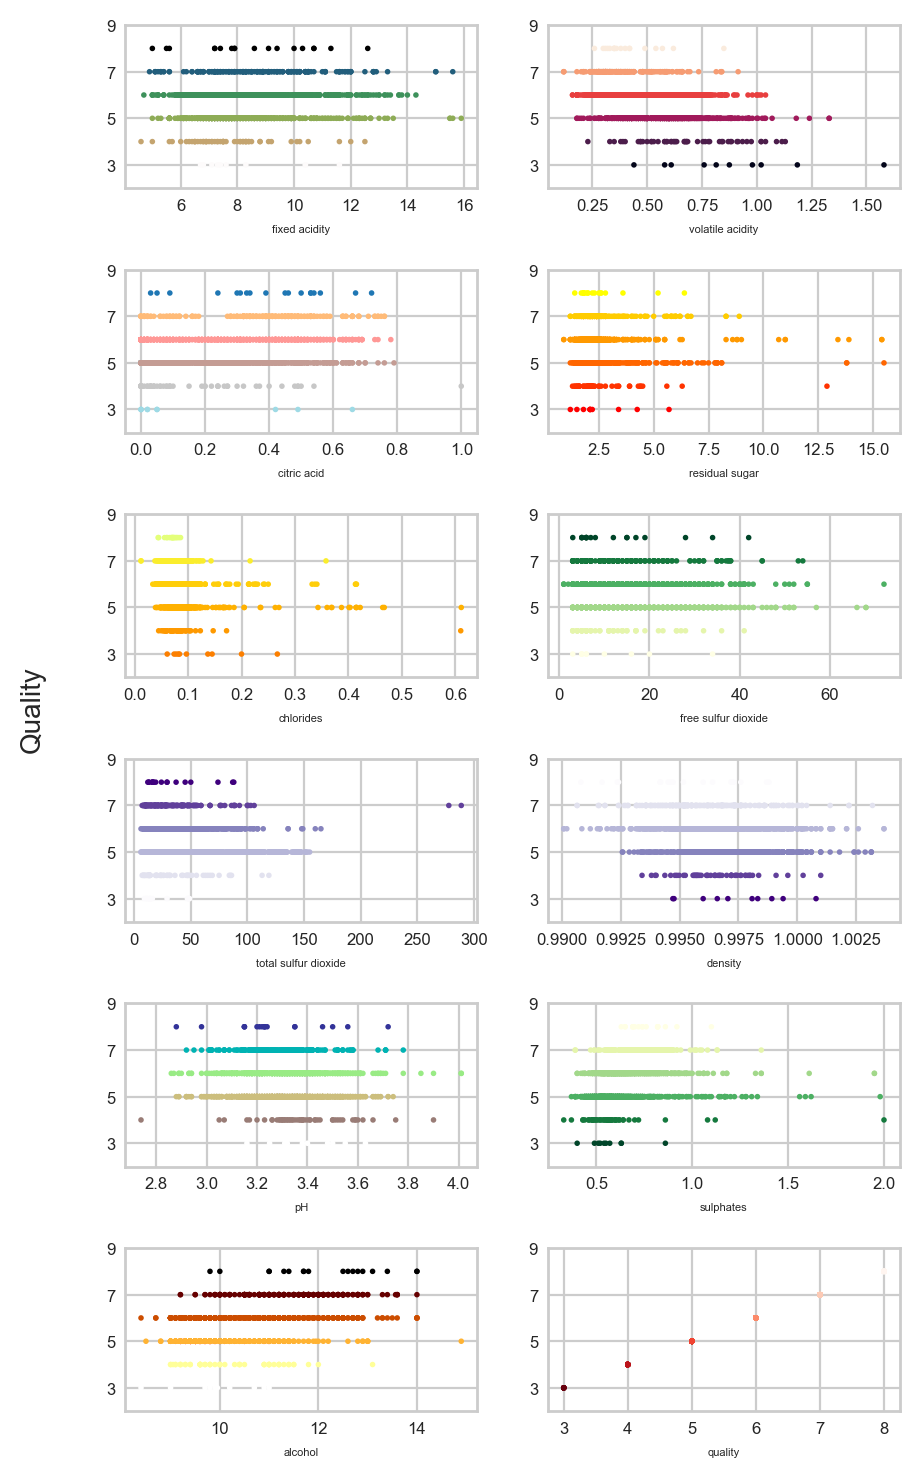

In [98]:
plt.style.use('seaborn-v0_8-whitegrid')
cols = np.array(data.columns)
y_ticks = [3,5,7,9]
cols = cols.reshape(6,2)
fig, ax = plt.subplots(6,2, figsize=(5,9), dpi = 200)
fig.text(0.02,0.5,"Quality", va = 'center', rotation = 'vertical', fontsize = 10)
for i in range(6):
    for j in range(2):
        ax[i, j].scatter(x = data[cols[i][j]], y = data['quality'], s = 1, c = data['quality'],
                         cmap = plt.colormaps()[np.random.randint(192)])
        ax[i,j].set(ylim = (2,9))
        ax[i,j].set_yticks(y_ticks)
        ax[i,j].set_xlabel(cols[i][j], fontsize = 4)
        ax[i,j].tick_params(labelsize=6)
fig.subplots_adjust(hspace=0.5)
plt.show()

In [82]:
len(plt.colormaps())

192

In [8]:
quality = data['quality']

<Axes: ylabel='alcohol'>

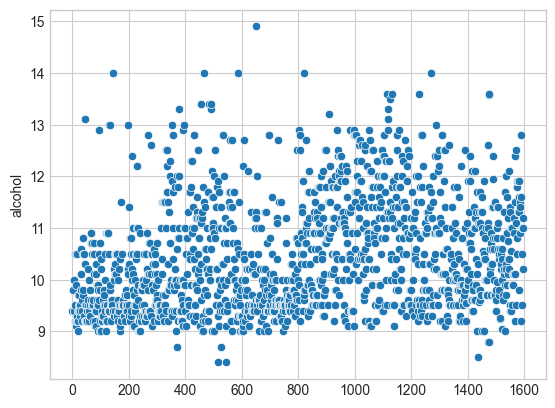

In [96]:
sns.scatterplot(x=indexes, y = data['alcohol'])

In [44]:
cols

In [50]:
plt.hist()


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [51]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

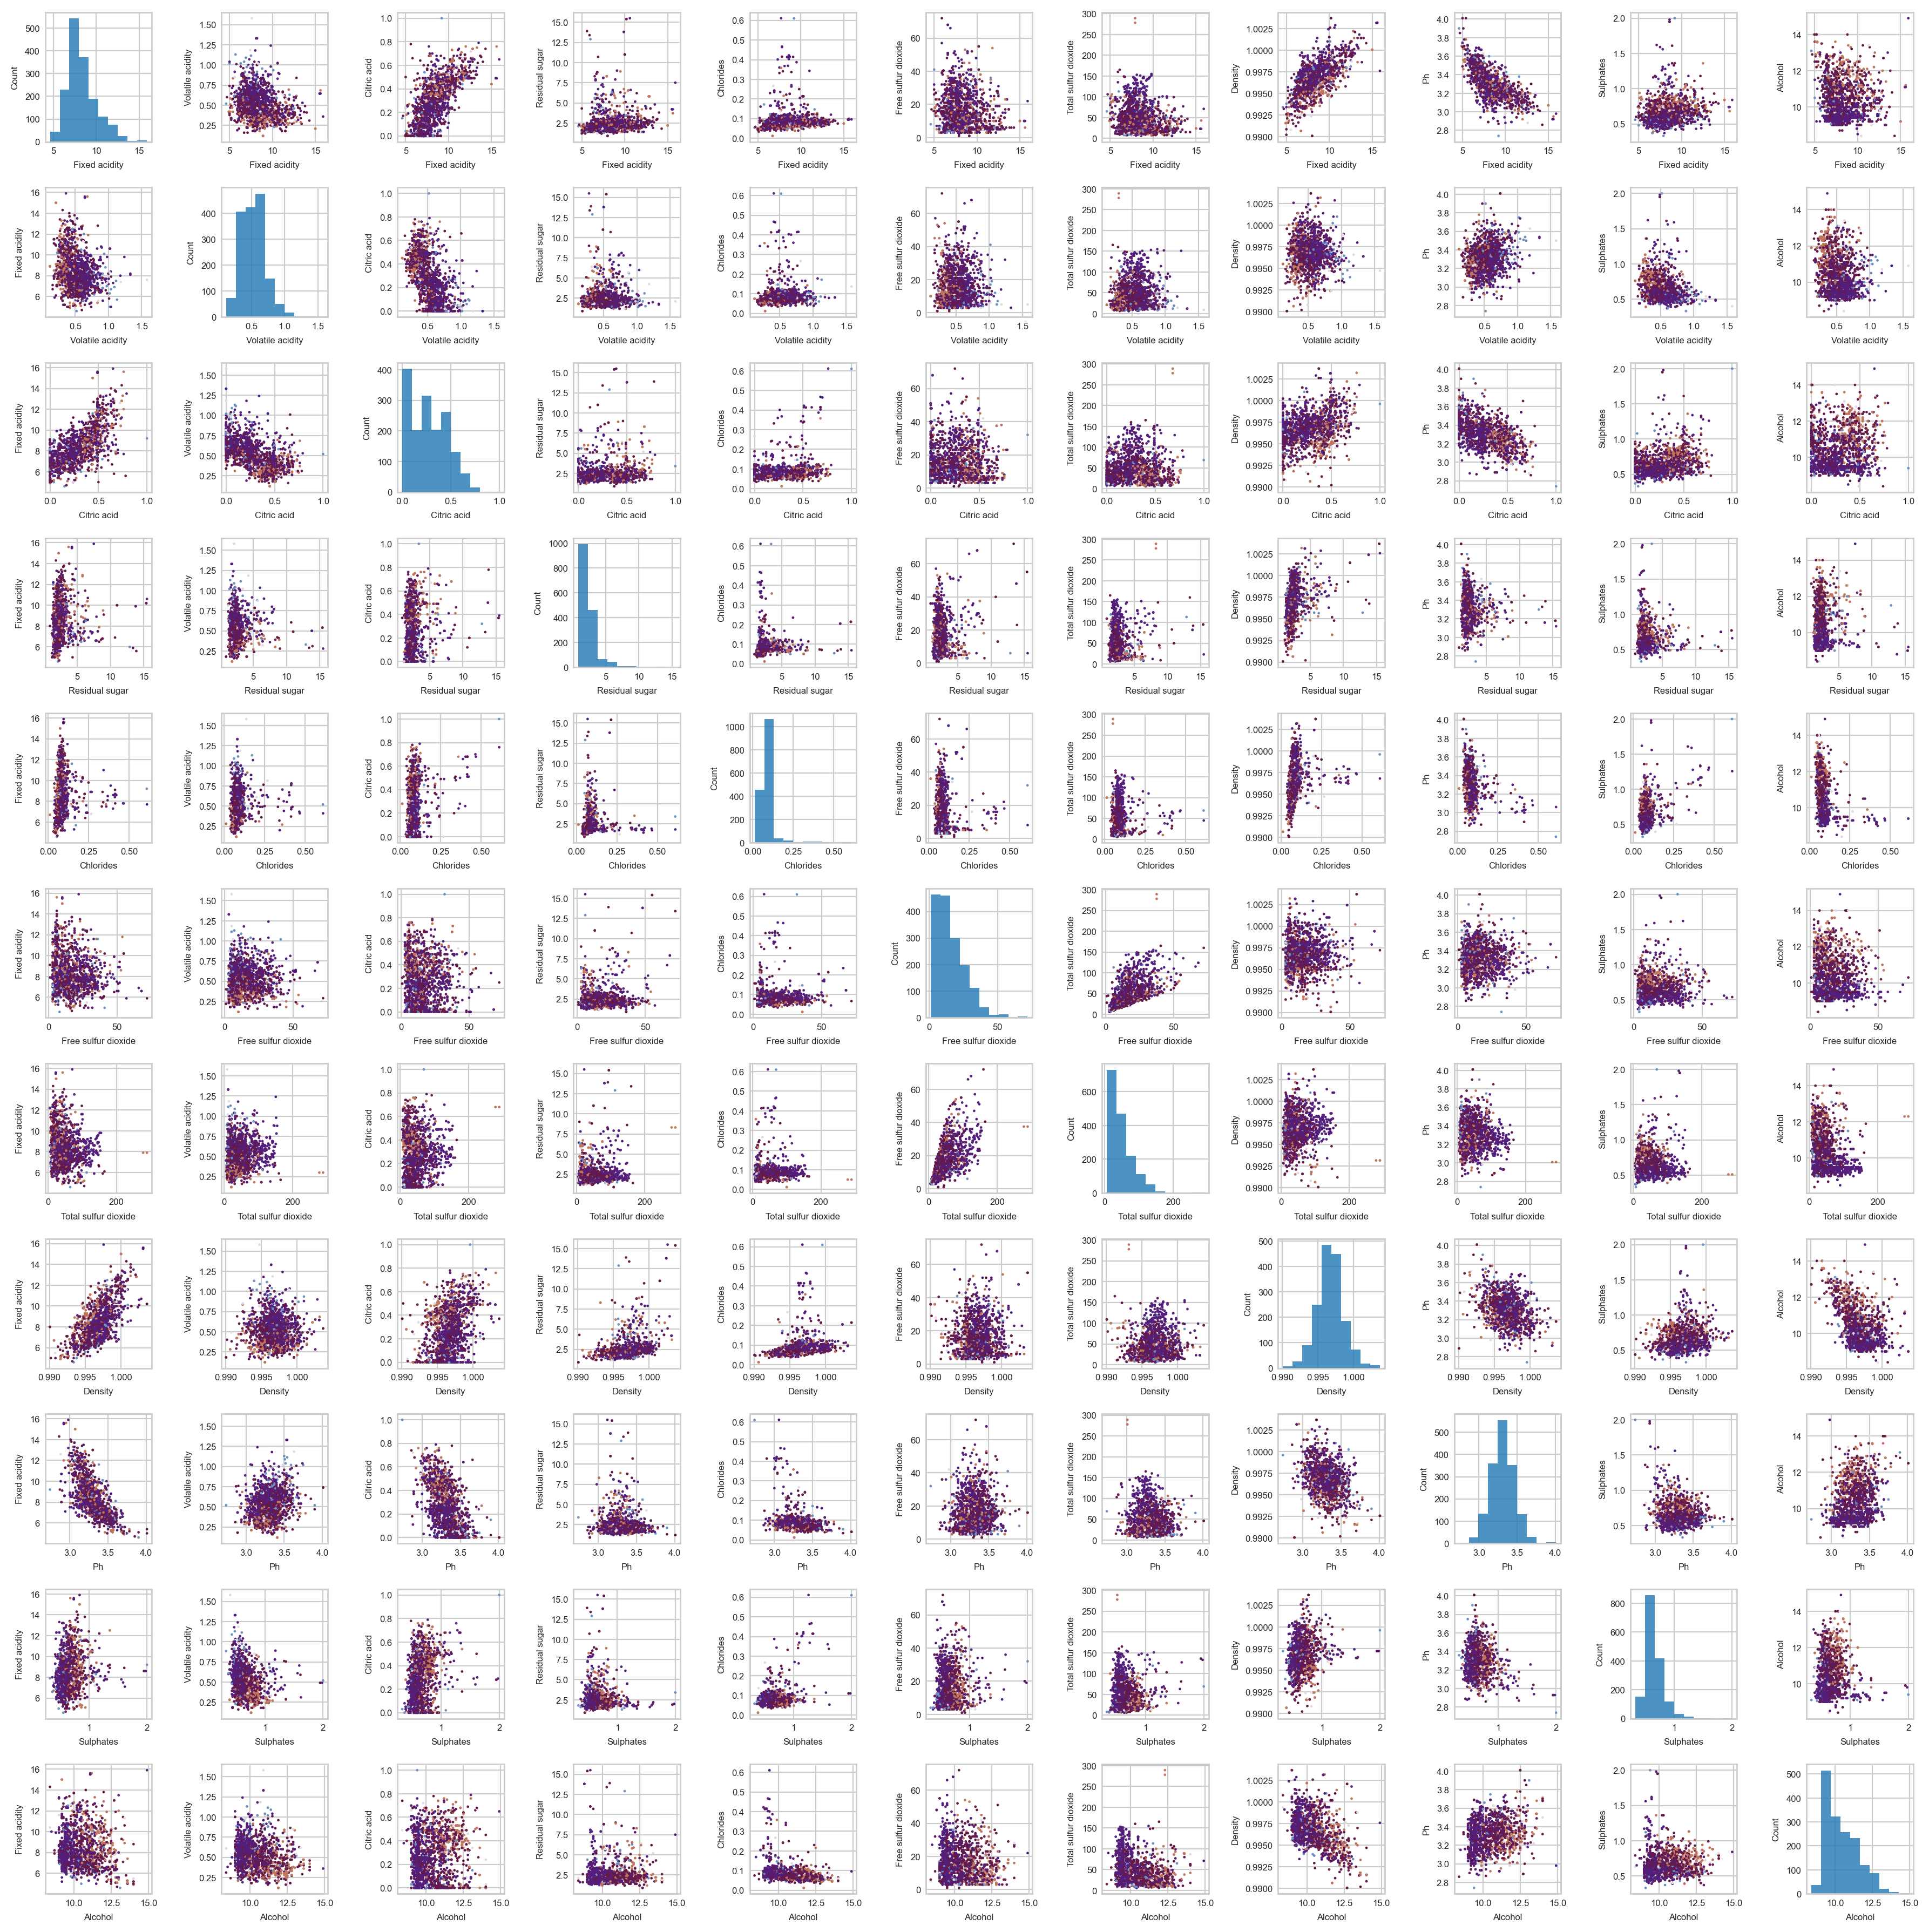

In [97]:
feature_count = len(cols)
fig, axes = plt.subplots(feature_count, feature_count, figsize=(18, 18), dpi = 200)


for i in range(feature_count):
    for j in range(feature_count):
        if i == j:
            axes[i, j].hist(data[cols[i]], alpha=0.8)
            axes[i, j].set_ylabel(f"Count", fontsize=6)
            
        else:
            axes[i, j].scatter(data[cols[i]], data[cols[j]], 
                               c = data['quality'], cmap = 'twilight', s=.5) 
            axes[i, j].set_ylabel(f"{cols[j].capitalize()}", fontsize=6)

        axes[i, j].set_xlabel(f"{cols[i].capitalize()}", fontsize=6)
        axes[i, j].tick_params(labelsize=6)
        

# Adjust layout
plt.tight_layout()
plt.show()

In [61]:
plt.scatter()

11

(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <BarContainer object of 10 artists>)

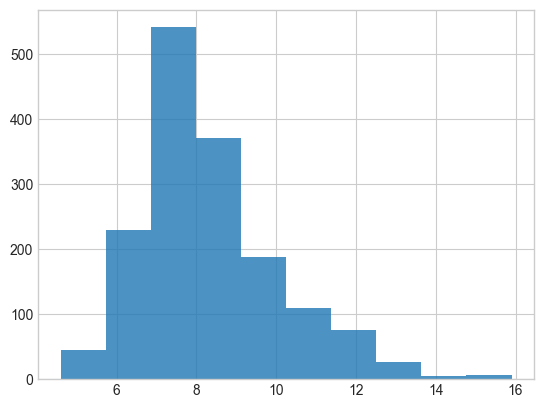

In [79]:
plt.hist(data[cols[i]], alpha=0.8)

In [84]:
s = "asdgsagfadhga"

<function str.capitalize()>